<a href="https://colab.research.google.com/github/viaNNation/Heart_Disease/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#importando as bibliotecas pandas, numpy, matplotlib, e sklearn para o uso

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [64]:
#importando as funções e scripts de machine learning para uso

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



In [65]:
#importando o data set do nosso diretório do github

df = pd.read_csv('https://raw.githubusercontent.com/viaNNation/Heart_Disease/main/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [66]:
#visualização das informações do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Todas as nossas váriaveis estão preenchidas em todas as linhas, e todas são números inteiros, exceto 'oldpeak' que é float**

In [67]:
#verificando se há informações não preenchidas no DF
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [68]:
#verificando linhas duplicadas no DF
df.duplicated().sum()

723

**Vimos que há 723 linhas duplicadas no nosso Data Frame**

In [69]:
#vamos retirar as linhas duplicadas para um novo data frame chamado hd

hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [70]:
#visualizando as informações estatísticas do nosso novo data frame hd.

hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Podemos ver algums outliers que precisaremos tratar para o nosso robô de machine learning**


<Axes: >

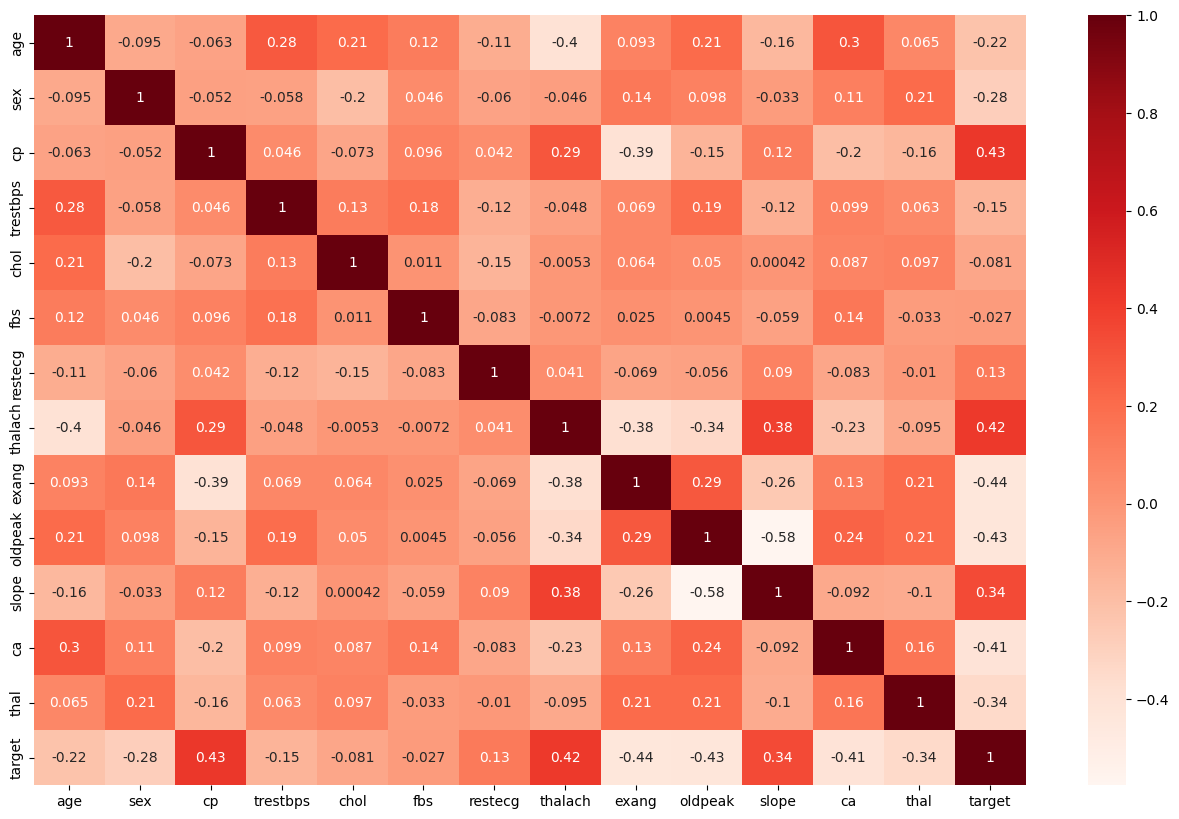

In [71]:
#vendo as correlações das variáveis

plt.figure(figsize = (16, 10))
sns.heatmap(hd.corr(), annot = True, cmap = 'Reds')

In [72]:
#visualizando todas as colunas do nosso data frame hd, para separarmos em colunas categóricas e numéricas.

for c in hd.columns:
  print (f"{c}: {hd[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


**Identificando as variáveis categóricas e numéricas, vamos separá-las**

In [73]:
#separando as variáveis em numericas e categoricas

categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

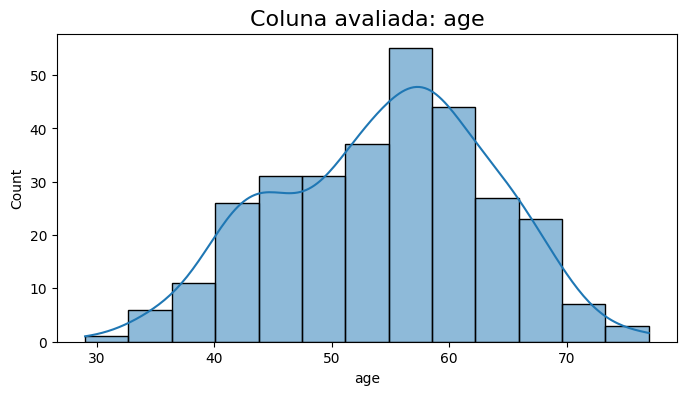

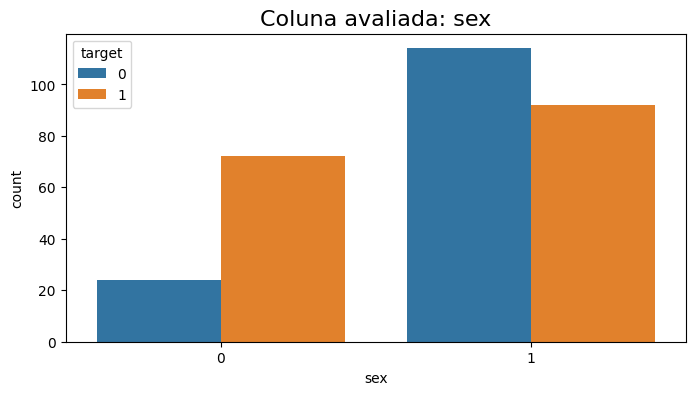

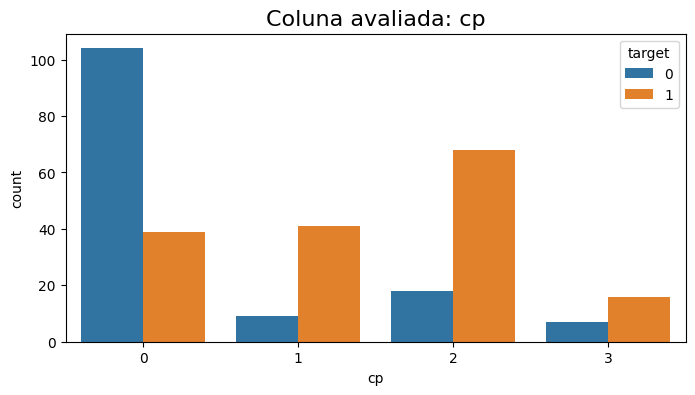

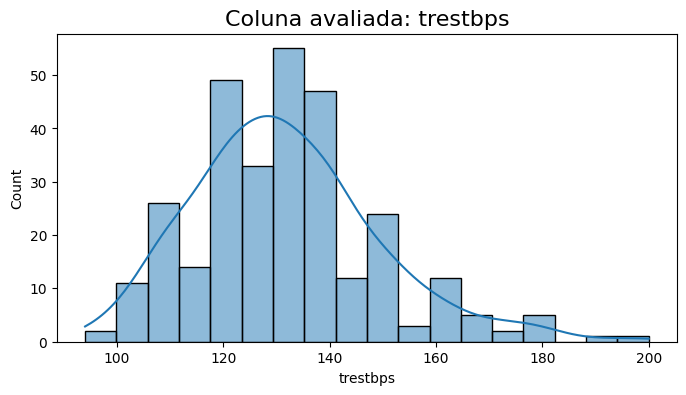

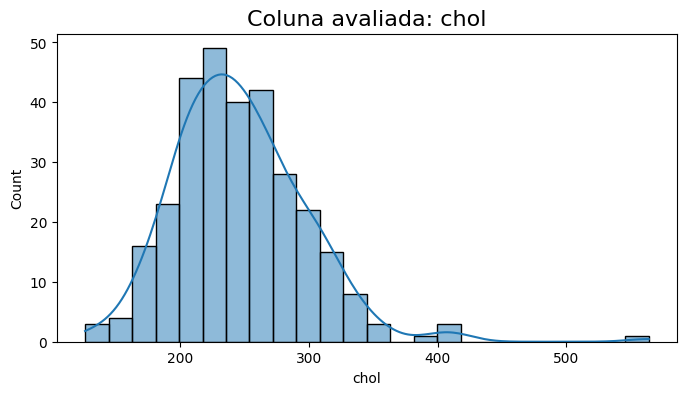

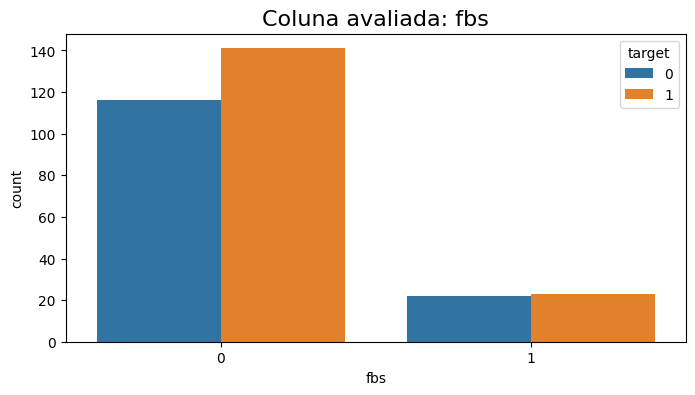

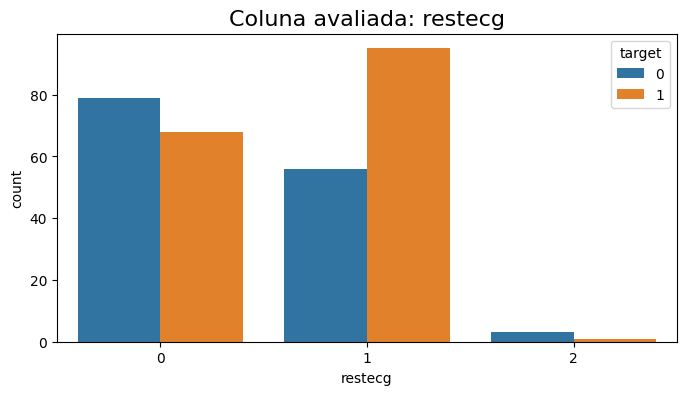

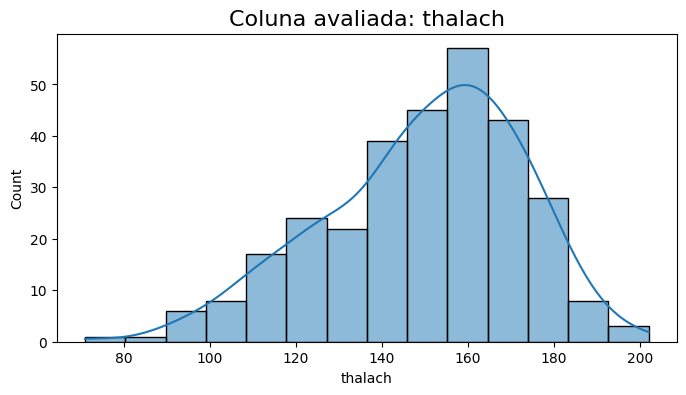

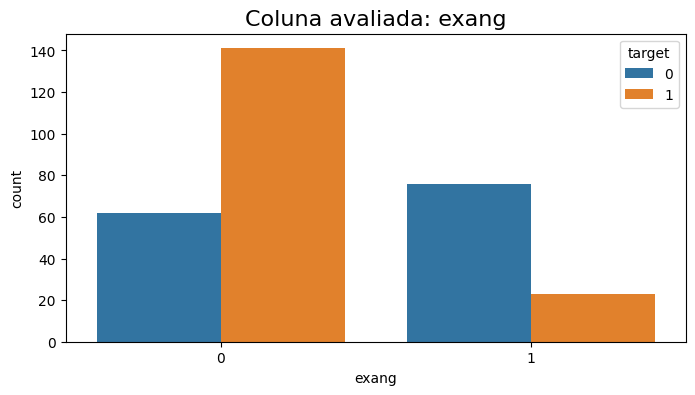

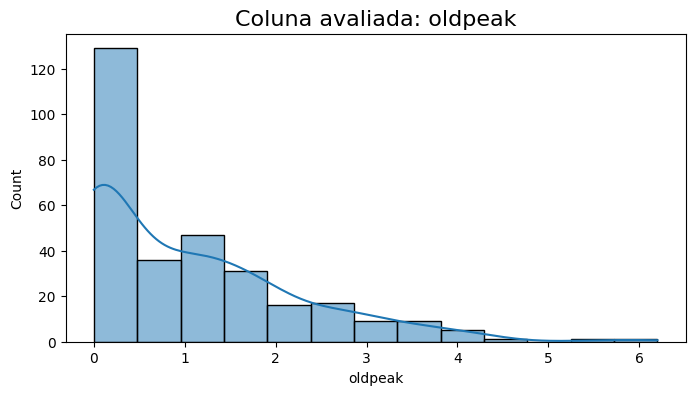

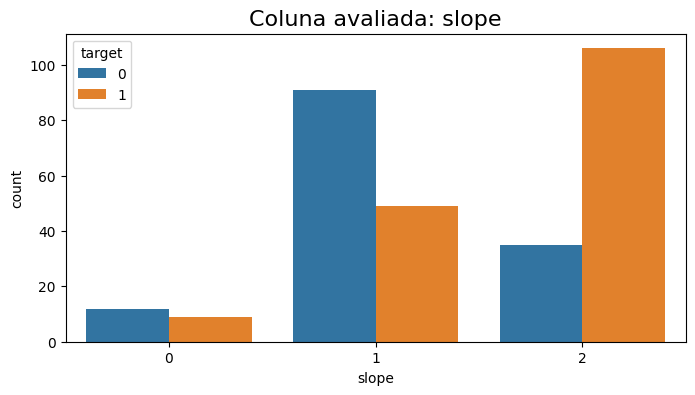

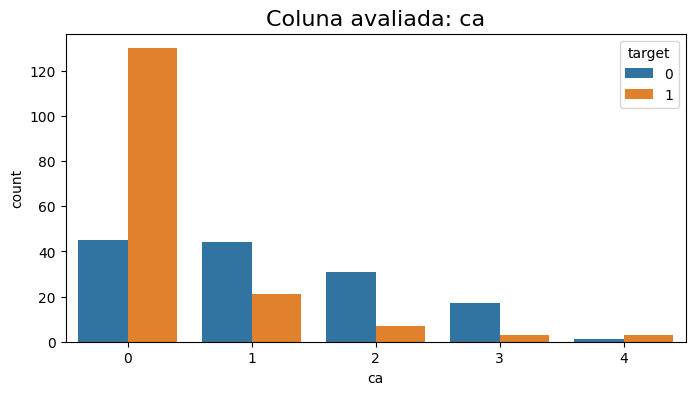

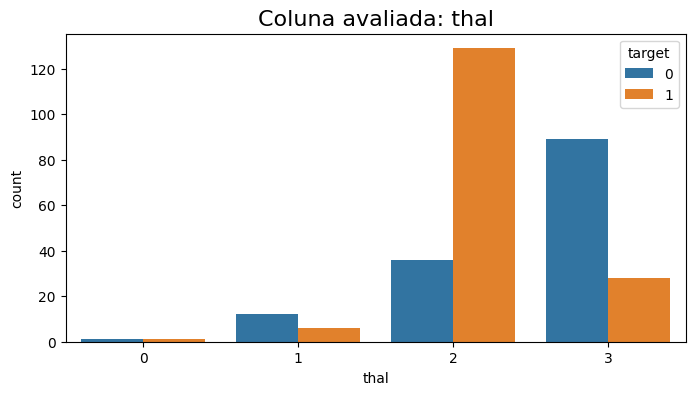

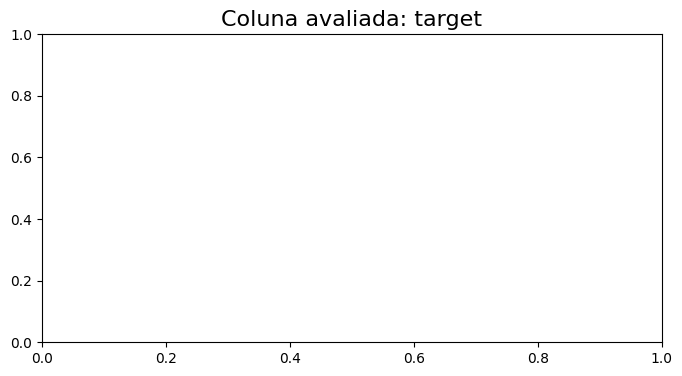

In [74]:
#plotando graficos para visualizações simplificadas das nossas variáveis

for c in hd.columns:
  plt.figure(figsize = (8, 4))
  plt.title (f"Coluna avaliada: {c}", fontsize = 16 )
  if c in categoricas:
    sns.countplot(x = hd[c], hue = hd['target'])
  if c in numericas:
    sns.histplot(hd[c], kde = True)



Vemos que a maior parte da nossa distibuição de idade está entre os 40 e 60 anos

Temos mais análises do sexo biológico masculino, mas as mulheres possuem uma proporção maior de doença do coração

Pessoas com algum tipo de dor no peito estão mais propensas a terem doença no coração

Não entendo muito bem o que o restante das variáveis significa justamente por não ter conhecimento avançado em cardiologia, mas seguiremos com o estudo e com o treinamento do robô de machine learning


<Axes: >

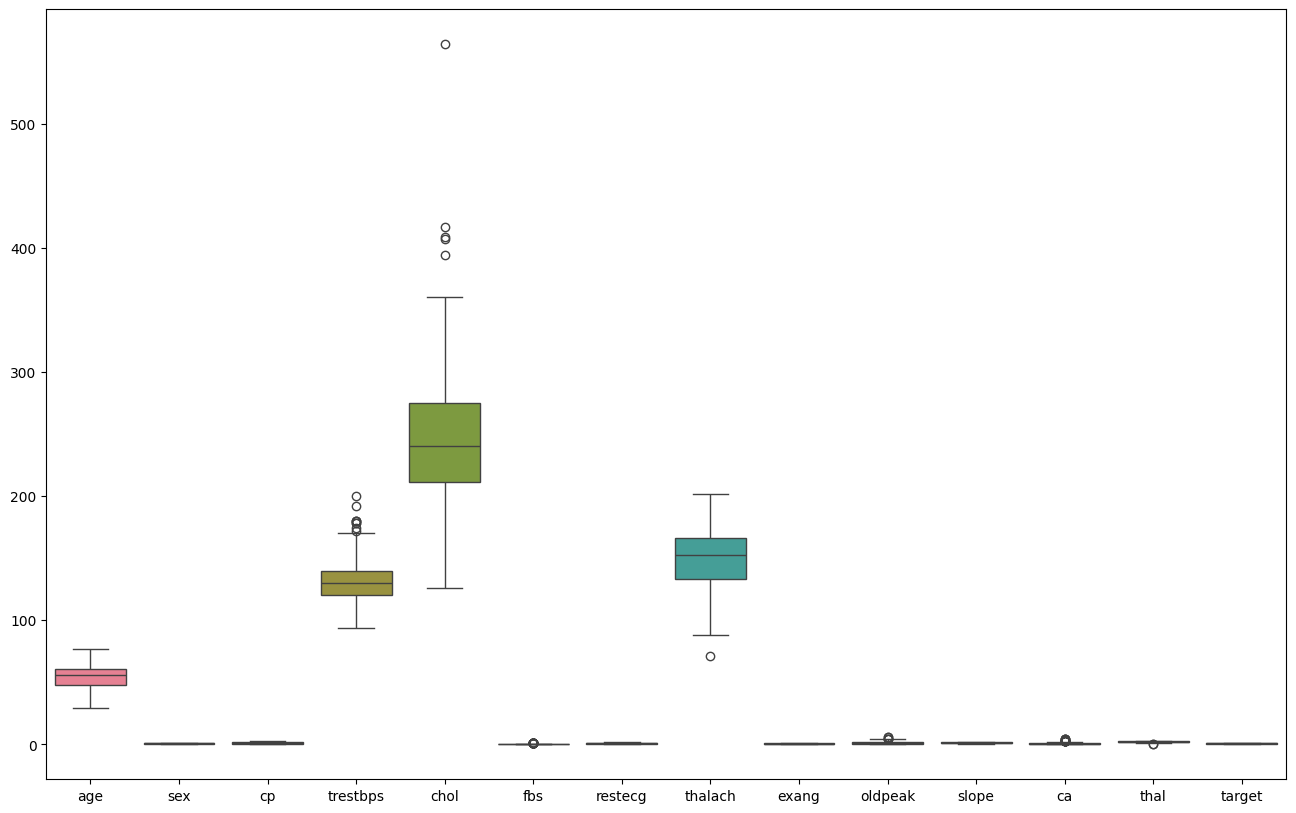

In [75]:
#visualização e remoção de outliers
plt.figure(figsize = (16, 10))
sns.boxplot(data = hd)

In [76]:
hd['trestbps'].quantile(0.98)

177.92000000000007

In [77]:
#remoção do topo dos valores de trestbps para remoção dos outliers

hd1 = hd[hd['trestbps'] < hd['trestbps'].quantile (0.98)]

<Axes: >

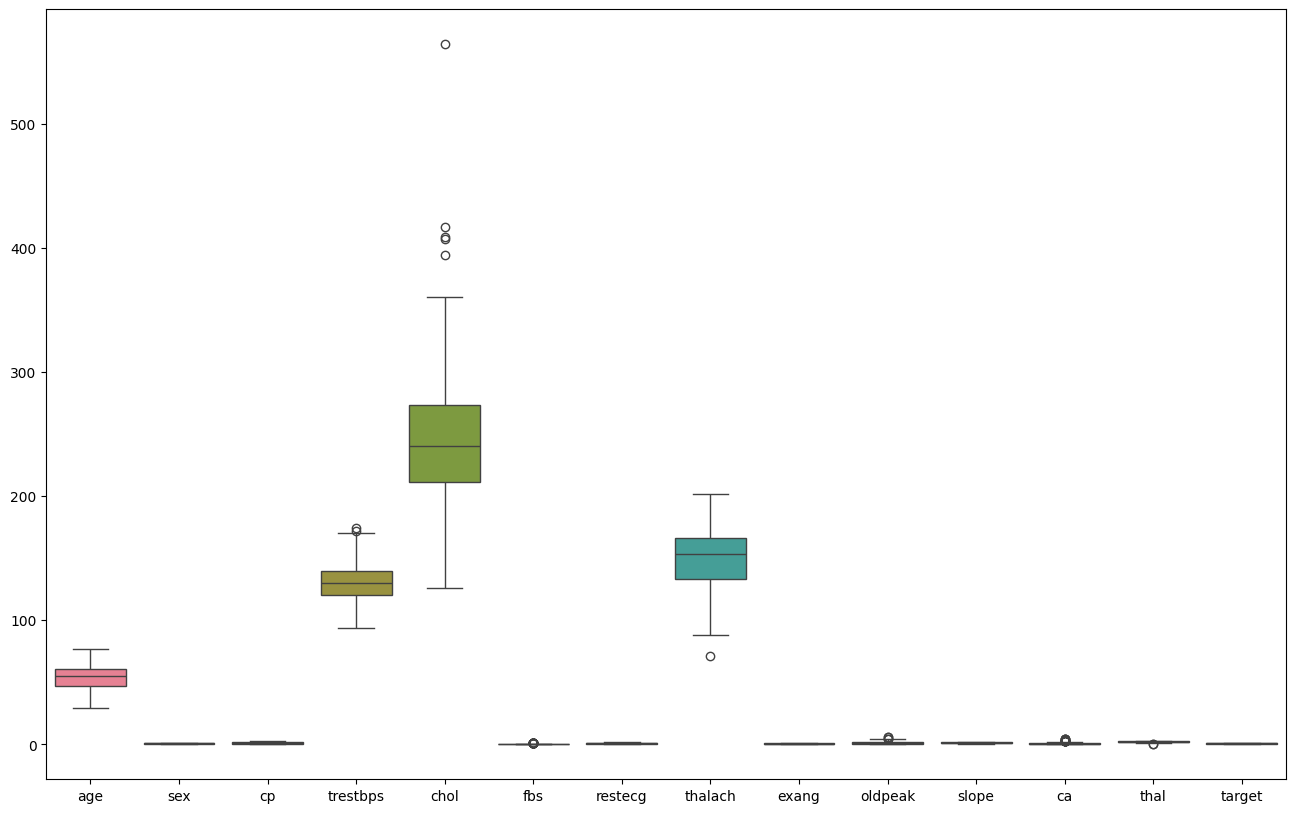

In [78]:
plt.figure(figsize = (16, 10))
sns.boxplot(data = hd1)

**Os outliers agora estão bem próximos do restante dos resultados. Faremos isso para o restante das variáveis numéricas agora**


In [79]:
hd1['chol'].quantile(0.98)

354.72

In [80]:
hd2 = hd1[hd1['chol'] < hd1['chol'].quantile (0.98)]

<Axes: >

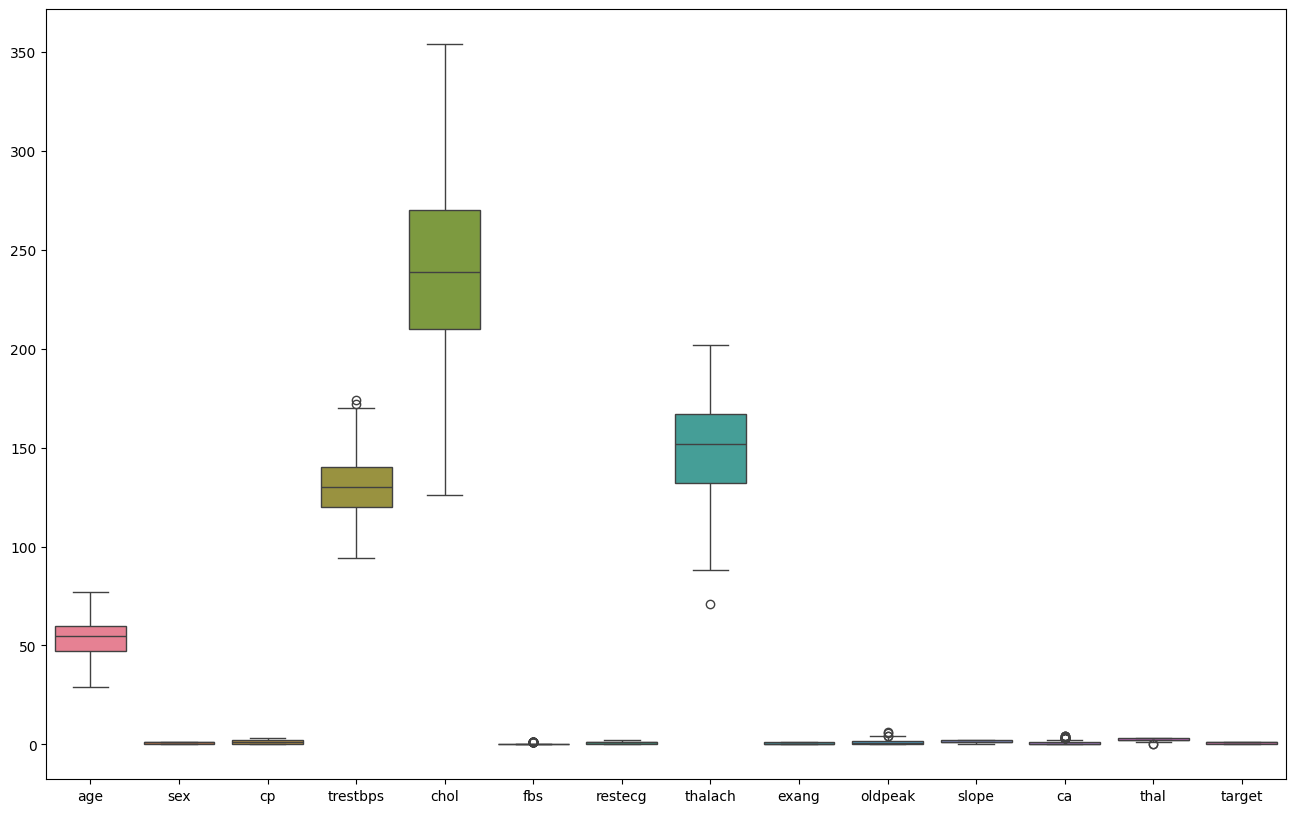

In [81]:
plt.figure(figsize = (16, 10))
sns.boxplot(data = hd2)

In [82]:
hd2['thalach'].quantile(0.005)

88.88

In [83]:
hd3 = hd2[hd2['thalach'] > hd1['thalach'].quantile (0.005)]

<Axes: >

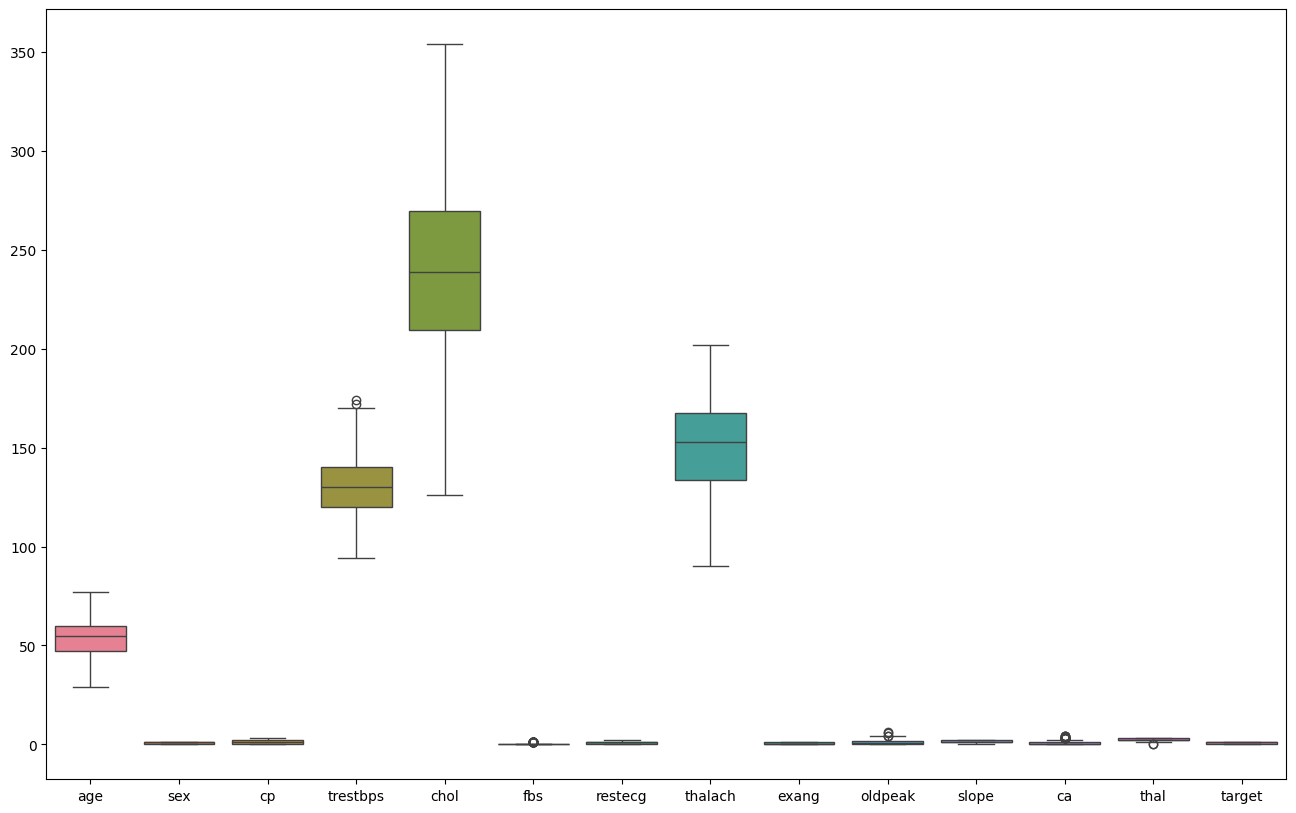

In [84]:
plt.figure(figsize = (16, 10))
sns.boxplot(data = hd3)

In [85]:
hd3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,54.045296,0.700348,0.972125,130.121951,241.763066,0.142857,0.533101,149.905923,0.320557,1.004530,1.411150,0.714286,2.299652,0.550523
std,9.062026,0.458906,1.030610,15.694274,44.442541,0.350538,0.520340,22.437205,0.467506,1.135726,0.613041,1.007960,0.615164,0.498310
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.500000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.500000,0.000000,1.000000,167.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,174.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [86]:
hd4 = pd.get_dummies(hd3, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] )
hd4

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
733,44,108,141,175,0.6,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
739,52,128,255,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
843,59,160,273,125,0.0,0,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False


**VAMOS COMEÇAR A TESTAR OS MODELOS DE MACHINE LEARNING PARA AVALIARMOS A ACURÁCIA DE CADA UM**

In [87]:
#criação de uma função para testarmos todos os modelos de ML

#definindo as variáveis X e y para uso no modelo de ML (variáveis padrão dos modelos)

def relatorio_ml (df, algoritmo, opt = 2):
  X = df.drop('target', axis = 1)
  y = df['target']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    #opt atualiza os parametros de interações para os diferentes tipos de algoritmo, evitando que de erro

  if opt == 0:
    ml = algoritmo(max_iter = 1000)
  elif opt == 1:
    ml = algoritmo(n_estimators = 1000)
  elif opt == 2:
    ml = algoritmo()

    #utilizando o fit no modelo de ML, criando as variáveis score train e score test para demonstração da acuracia do modelo

  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print (f"acuracia treino:  {score_train * 100:.2f}%")
  score_test = ml.score(X_test, y_test)
  print (f"acuracia teste:  {score_test * 100:.2f}%")

# impressão do classofication report, e da confusion matrix para visualização dos acertos e erros do modelo

  y_previsto = ml.predict(X_test)
  print ("----CLASSIFICATION REPORT----")
  print (classification_report(y_test, y_previsto))
  print ("----CONFUSION MATRIX----")
  confusao = confusion_matrix(y_test, y_previsto)
  sns.heatmap (confusao, annot = True, cmap = 'Reds')

  return score_train, score_test


acuracia treino:  87.34%
acuracia teste:  86.21%
----CLASSIFICATION REPORT----
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.86      0.86      0.86        28

    accuracy                           0.86        58
   macro avg       0.86      0.86      0.86        58
weighted avg       0.86      0.86      0.86        58

----CONFUSION MATRIX----


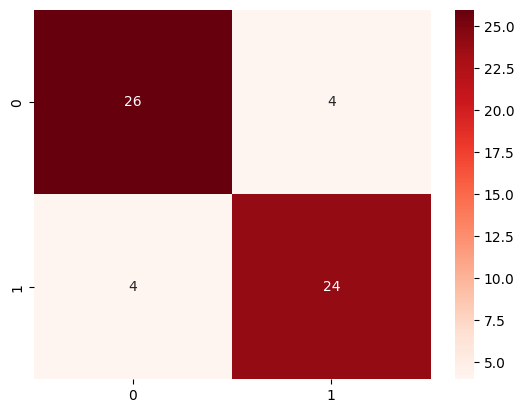

In [88]:
log_train, log_test = relatorio_ml (hd4, LogisticRegression, opt = 0)

acuracia treino:  100.00%
acuracia teste:  75.86%
----CLASSIFICATION REPORT----
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        30
           1       0.82      0.64      0.72        28

    accuracy                           0.76        58
   macro avg       0.77      0.75      0.75        58
weighted avg       0.77      0.76      0.76        58

----CONFUSION MATRIX----


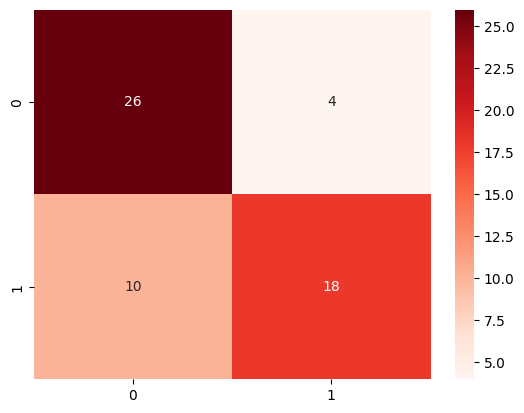

In [89]:
tree_train, tree_test = relatorio_ml (hd4, DecisionTreeClassifier)